# Udacity project:
## Twitter data wrangling (WeRateDogs)

## Table of Contents
- [Introduction](#intro)
- [Gathering data](#gather)
- [Assessing data](#assess)
- [Cleaning data](#clean)
- [Storing, Analyzing, and Visualizing](#3steps)
   - [Insight one & visualization: Do some weekdays have more twitter activity than others?](#ins1)
   - [Insight two & visualization: What's the most common breed in the dataset?](#ins2)
   - [Insight three & visualization: Which is the top rated breed?](#ins3)

## Introduction<a id='intro'></a>
The idea behind this project is to put into practice the knowledge shared on the Data wrangling unit of Udacity's course by dealing with sources of data, downloading it and then going through it (following the Gather-Assess-Clean approach) to arrive at a conclusion.  
In this case, we will use a Twitter archive from a user commonly known as WeRateDogs in which people upload pictures of their dogs and get rated based on their cuteness.

<a id='gather'></a>
## Gathering data
In this step, we will work with the following files:
- **Twitter archive:** This was already provided on Udacity's programme
- **Image predictions based on tweets:** It was generated on a neural network and is hosted on Udacity's server so we need to download it in such a way that allows other people to reproduce what we did, aka, programatically. For this, we will use the "Requests" library and the file's URL is below:
https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
- **Twitter's additional information:** Here we will work with the output of Twitter's API which was downloaded from Udacity.  
  
  Given I was not familiar with these sources before starting the project, I'll review each one of them right after reading the files into the workspace and before moving on and will document what they contain and any other relevant fact about them.


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import requests
import json
import os
import glob
from functools import reduce
from calendar import day_name
import warnings

## Twitter-archive-enhanced
We already downloaded this from Udacity so we only need to import it into the notebook.

In [71]:
tw_arch_raw = pd.read_csv('twitter-archive-enhanced.csv')
tw_arch_raw.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [72]:
tw_arch_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [73]:
# Checking for duplicates in the key fields
# Quick way of counting uniques:
# https://stackoverflow.com/questions/38309729/count-unique-values-with-pandas-per-groups
tw_arch_raw[['tweet_id','text']].nunique()

tweet_id    2356
text        2356
dtype: int64

## Twitter-archive-enhanced (variable tw_arch_raw)
#### Description and first look  
I only went through the columns I think are relevant in this dataframe as I don't think things like "source" are worth spending time on.
- **tweet_id:**   
Info: This is the unique identifier of the tweets. We will use it as the key when merging when other dataframes.  
Type: int. It's okay because even though we might use it as a string later on, it only contain numbers so it makes sense. Formatting might be needed afterwards.  
 
- **timestamp:**  
Info: This is when the tweet was posted.  
Type: It's an object but it should be datetime.  
 
- **text:**  
Info: This is the tweet.  
Type: Object, it's OK.  
  
There aren't any duplicates in either tweet_id or text so we can rule out duplicated rows in this df

## Image predictions  
The URL of this file was provided and, since we know it's a .tsv file, we will download it and read it as such.

In [74]:
# This could be easier by assigning the URL to a variable and then reading that variable into our df
# but for the sake of the project, "Requests" will be used.
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

# Now we read the downloaded file into a variable to be used throughout the project.
img_pred_raw = pd.read_csv('image-predictions.tsv', sep='\t' )
img_pred_raw.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [75]:
img_pred_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [76]:
# Checking for duplicates
img_pred_raw.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

## Image-predictions (variable img_pred_raw)
#### Description and first look  
I only went through the columns I think are relevant in this dataframe.  

- **tweet_id:**   
Info: This is the unique identifier of the tweets. We will use it as the key when merging when other dataframes.  
Type: int. It's okay because even though we might use it as a string later on, it only contain numbers so it makes sense. Formatting might be needed afterwards.  
 
- **p1, p2 and p3:**  
Info: This are the breeds estimated by the neural network who generated this file (with p1 being the most accurate breed estimation and p3 the least).
Type: It's an object, it's OK because it's text.  
 
- **p1_conf, p2_conf and p3_conf:**  
Info: This is the percentage of accuracy over the breed estimation.  
Type: These are percentages so it's OK for them to be floats.  

- **p1_dog, p2_dog and p3_dog:**  
Info: This is a confirmation on whether the neural network deemed the subject to be a dog or not.  
Type: This field has either True or False so it's okay for it to be bool.  
  
There aren't any duplicates in either tweet_id or text so we can rule out duplicated rows in this df

## Twitter API file
We are not connecting through the API so we are using the file provided by Udacity.

In [77]:
tweet_json_raw = pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])
with open('tweet-json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        tweet_json_raw = tweet_json_raw.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]], columns=['tweet_id','retweet_count','favorite_count']))
tweet_json_raw = tweet_json_raw.reset_index(drop=True)

In [78]:
tweet_json_raw.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [79]:
tweet_json_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


In [80]:
# Checking for duplicates
tweet_json_raw['tweet_id'].nunique()

2354

## tweet_json file (variable tweet_json_raw)
#### Description and first look  
This dataframe is pretty straightforward and doesn't require much explanation. 

- **tweet_id:**   
Info: This is the unique identifier of the tweets. We will use it as the key when merging when other dataframes.  
Type: Unlike the previous dataframes, here the ID is a string so we won't need to do anything to it.
 
- **retweet_count:**  
Info: This is the number of **retweets** the post had.  
Type: It's an object so it's okay.  
 
- **favorite_count:**  
Info: This is the number of **likes** the post had.   
Type: It's an object so it's okay.   

There aren't any duplicates in tweet_id of this dataframe so it's good to go as it is.

<a id='assess'></a>
# Assessing data   

## Quality issues:

#### * **tw_arch_raw:**  
- [Null values: there are nulls in several columns (such as retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) as evidenced on the .head result. These should be removed.](#assess1) 
- [tweet_id should be str in order to be used as the key to merge with the other dataframes.](#assess2)  
- [timestamp should be datetime](#assess3)  

- [rating_numerator and rating_denominator don't make much sense as it's usually outside the 10/10 norm so we will create a new column to replace them and have a uniform field.](#assess5)  
  
#### * **img_pred_raw:**
- [tweet_id should be str in order to be used as the key to merge with the other dataframes.](#assess2) 
- [jpg_url has 66 duplicates](#assess6) 
- [p1, p2 and p3 have underscores instead of spaces between words and some begin with uppercase while others don't. A new column __Breed__ will be created with the 3 above and the quality issues will be cleaned.](#assess7)   
  
#### * **tweet_json_raw:**
- [tweet_id should be str in order to be used as the key to merge with the other dataframes.](#assess2) 
- [retweet_count and favorite_count should be int](#assess8)  

## Tidiness issues:
- [doggo, floofer, pupper and puppo have the same time of data so these 4 should be merged into a single column](#assess4)  
- [Data was scattered across 3 dataframes so I merged them into a single dataframe.](#assess9)

<a id='clean'></a>
# Cleaning data   

In [81]:
# Copies of the raw DFs are created to avoid changing anything in them by using the .copy method
arch_clean = tw_arch_raw.copy()
img_clean = img_pred_raw.copy()
json_file_clean = tweet_json_raw.copy()

In [82]:
arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [83]:
img_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [84]:
json_file_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assess1'></a>
#### tw_arch_raw: 
Define
- Null values: there are nulls in several columns (such as as retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) as evidenced on the .head result. These should be removed.

In [85]:
arch_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

Code

In [86]:
# Drops fields with the higher null count
arch_clean = arch_clean[arch_clean.retweeted_status_id.isnull()]
arch_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

Test

In [87]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


<a id='assess2'></a>
#### tw_arch_raw, img_pred_raw, tweet_json_raw:  
Define
- tweet_id should be str in order to be used as the key to merge with the other dataframes

Code

In [88]:
arch_clean['tweet_id'] = arch_clean['tweet_id'].astype(str)
img_clean['tweet_id'] = img_clean['tweet_id'].astype(str)
json_file_clean['tweet_id'] = json_file_clean['tweet_id'].astype(str)

Test

In [89]:
arch_clean.info()
img_clean.info()
json_file_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(2), object(10)
memory usage: 220.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -------

<a id='assess3'></a>
#### tw_arch_raw:  
Define
- timestamp should be datetime

Code

In [90]:
arch_clean['timestamp'] = pd.to_datetime(arch_clean['timestamp'])

In [91]:
# Additionally, we will split this timestamp field into new fields with different date-related data
arch_clean['day'] = arch_clean['timestamp'].dt.day
arch_clean['month'] = arch_clean['timestamp'].dt.month
arch_clean['year'] = arch_clean['timestamp'].dt.year
arch_clean['weekday'] = arch_clean['timestamp'].dt.day_name()

Test

In [92]:
arch_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,day,month,year,weekday
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1,8,2017,Tuesday


<a id='assess4'></a>
#### tw_arch_raw:  
Define
- doggo, floofer, pupper and puppo have the same time of data so these 4 should be merged into a single column

Code

In [93]:
# Handling the "nones"
arch_clean.doggo.replace('None', '', inplace=True)
arch_clean.floofer.replace('None', '', inplace=True)
arch_clean.pupper.replace('None', '', inplace=True)
arch_clean.puppo.replace('None', '', inplace=True)

In [94]:
# Melt the fields to dogs and dogs_stage. We then drop dogs.
arch_clean = pd.melt(arch_clean, id_vars=['tweet_id',
                                                 'timestamp',
                                                    'source',
                                                    'text',
                                            'expanded_urls',
                                            'rating_numerator',
                                            'rating_denominator',
                                            'name',
                                             'day',
                                            'month',
                                             'year',
                                             'weekday',]
                                            ,var_name='dogs', value_name='dogs_stages')

arch_clean = arch_clean.drop('dogs', 1)

# We remove duplicates
arch_clean = arch_clean.sort_values('dogs_stages').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

In [95]:
arch_clean.groupby('dogs_stages')[['dogs_stages']].count()

,dogs_stages
dogs_stages,
,1831
doggo,75
floofer,10
pupper,234
puppo,25


Test

In [96]:
# Confirming the new field has all the values
arch_clean.info()
arch_clean['dogs_stages'].value_counts().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   day                 2175 non-null   int64              
 9   month               2175 non-null   int64              
 10  year                2175 non-null   int64              
 11  weekday             2175 non-null   object             
 12  dogs_stages         2175 non-nu

2175

<a id='assess5'></a>
#### tw_arch_raw:  
Define
- rating_numerator and rating_denominator don't make much sense as it's usually outside the 10/10 norm so we will create a new column to replace them and have a uniform field.

Code

In [97]:
# Before creating the new field, we have to remove records with zero on the denominator as it will
# prevent us from using it in the division
arch_clean = arch_clean[arch_clean.rating_denominator != 0]
arch_clean[['rating_numerator','rating_denominator']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 2095 to 7298
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rating_numerator    2174 non-null   int64
 1   rating_denominator  2174 non-null   int64
dtypes: int64(2)
memory usage: 51.0 KB


In [98]:
arch_clean[['rating_numerator', 'rating_denominator']] = arch_clean[['rating_numerator','rating_denominator']].astype(float)

In [99]:
arch_clean[['rating_numerator','rating_denominator']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 2095 to 7298
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating_numerator    2174 non-null   float64
 1   rating_denominator  2174 non-null   float64
dtypes: float64(2)
memory usage: 51.0 KB


In [100]:
# Increasing the number of characters shown in the text field to make sure we can capture the rating
# I found a way to deactivate the warning this section showed me on this link
#https://stackoverflow.com/questions/39901550/python-userwarning-this-pattern-has-match-groups-to-actually-get-the-groups

warnings.filterwarnings("ignore", 'This pattern has match groups')

with pd.option_context('max_colwidth', 500):
    display(arch_clean[arch_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['text', 'rating_numerator', 'rating_denominator']])



,text,rating_numerator,rating_denominator
42,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
3685,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10.0
3708,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0
2733,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
4967,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0


In [101]:
# Got the idea to pull the numerator from the text field in the following link
# https://www.geeksforgeeks.org/python-pandas-series-str-extract/
rating = arch_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
rating.head()

,rating_numerator,rating_denominator
2095,6,10
2094,11,10
2093,7,10
2092,11,10
2091,7,10


In [102]:
arch_clean[['rating_numerator', 'rating_denominator']] = rating[['rating_numerator', 'rating_denominator']]

In [103]:
# Increasing the number of characters shown in the text field to make sure we can capture the rating
with pd.option_context('max_colwidth', 500):
    display(arch_clean[arch_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5,10
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.5,10
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
4967,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10


In [104]:
arch_clean[['rating_numerator','rating_denominator']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 2095 to 7298
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rating_numerator    2174 non-null   object
 1   rating_denominator  2174 non-null   object
dtypes: object(2)
memory usage: 51.0+ KB


In [105]:
arch_clean[['rating_numerator', 'rating_denominator']] = arch_clean[['rating_numerator','rating_denominator']].astype(float)
arch_clean[['rating_numerator','rating_denominator']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 2095 to 7298
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating_numerator    2174 non-null   float64
 1   rating_denominator  2174 non-null   float64
dtypes: float64(2)
memory usage: 51.0 KB


In [106]:
# This finally creates the rating column
def rank (arch_clean):
    x = (arch_clean['rating_numerator']/ arch_clean['rating_denominator'])*100
    return x

arch_clean['rating'] = arch_clean.apply(lambda row: rank(row), axis=1)

Test

In [107]:
arch_clean['rating'].head()

2095     60.0
2094    110.0
2093     70.0
2092    110.0
2091     70.0
Name: rating, dtype: float64

<a id='assess6'></a>
#### img_pred_raw:  
Define
- jpg_url has 66 duplicates

Code

In [108]:
# Reviewing the duplicates in jpg_url
img_clean['jpg_url'].duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [109]:
# Removing them and confirming they were deleted
img_clean['jpg_url'].drop_duplicates(keep='first', inplace=True)


Test

In [110]:
img_clean['jpg_url'].duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

<a id='assess7'></a>
#### img_pred_raw:  
Define
- p1, p2 and p3 have underscores instead of spaces between words and some begin with uppercase while others don't. A new column __Breed__ will be created with the 3 above and the quality issues will be cleaned.

Code

In [111]:
# Defining this functions to create the columns "breed" and "confidence"
# A single function could have been defined but I think it's easier to separate them so each function
# works with a different variable as it makes it easier to read

def breed_pred (img_clean):
    if img_clean['p1_dog'] == True:
        return img_clean['p1']
    elif img_clean['p2_dog'] == True:
        return img_clean['p2']
    elif img_clean['p3_dog'] == True:
        return img_clean['p3']
    else:
        return (np.NaN)
    
def breed_conf (img_clean):
    if img_clean['p1_dog'] == True:
        return img_clean['p1_conf']
    elif img_clean['p2_dog'] == True:
        return img_clean['p2_conf']
    elif img_clean['p3_dog'] == True:
        return img_clean['p3_conf']
    else:
        return (np.NaN)


In [112]:
img_clean['breed'] = img_clean.apply(lambda row: breed_pred (row),axis=1)
img_clean['breed'].value_counts()

golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
pug                      65
                       ... 
EntleBucher               1
Bouvier_des_Flandres      1
silky_terrier             1
Irish_wolfhound           1
clumber                   1
Name: breed, Length: 113, dtype: int64

In [113]:
img_clean['confidence'] = img_clean.apply(lambda row: breed_conf (row),axis=1)
img_clean['confidence'].value_counts()

0.574557    2
0.908703    2
0.046403    2
0.964929    2
0.420463    2
           ..
0.852088    1
0.273492    1
0.393330    1
0.542982    1
0.378151    1
Name: confidence, Length: 1688, dtype: int64

Test

In [114]:
img_clean[['breed','confidence']].head()

,breed,confidence
0,Welsh_springer_spaniel,0.465074
1,redbone,0.506826
2,German_shepherd,0.596461
3,Rhodesian_ridgeback,0.408143
4,miniature_pinscher,0.560311


Code (2)

In [115]:
# We clean the underscores and capitalize the breed field
img_clean.breed = img_clean.breed.str.capitalize()
img_clean.breed = img_clean.breed.str.replace('_',' ')
img_clean[['breed','confidence']].head()
img_clean.dropna(inplace=True)

Test (2)

In [116]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1751 non-null   object 
 1   jpg_url     1751 non-null   object 
 2   img_num     1751 non-null   int64  
 3   p1          1751 non-null   object 
 4   p1_conf     1751 non-null   float64
 5   p1_dog      1751 non-null   bool   
 6   p2          1751 non-null   object 
 7   p2_conf     1751 non-null   float64
 8   p2_dog      1751 non-null   bool   
 9   p3          1751 non-null   object 
 10  p3_conf     1751 non-null   float64
 11  p3_dog      1751 non-null   bool   
 12  breed       1751 non-null   object 
 13  confidence  1751 non-null   float64
dtypes: bool(3), float64(4), int64(1), object(6)
memory usage: 169.3+ KB


<a id='assess8'></a>
#### tweet_json_raw:  
Define
- retweet_count and favorite_count should be int  

Code

In [117]:
json_file_clean[['retweet_count','favorite_count']] = json_file_clean[['retweet_count','favorite_count']].astype(int)

Test

In [118]:
json_file_clean[['retweet_count','favorite_count']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   retweet_count   2354 non-null   int32
 1   favorite_count  2354 non-null   int32
dtypes: int32(2)
memory usage: 18.5 KB


<a id='assess9'></a>
#### Merging of the dataframes to create a new, consolidated one
Define
We'll go through the dfs and merge based on the smaller one and will only pull the fields we are going to use.

Code

In [119]:
# First we look at all the dfs to see what they look like now
arch_clean.info()
img_clean.info()
json_file_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 2095 to 7298
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2174 non-null   object             
 1   timestamp           2174 non-null   datetime64[ns, UTC]
 2   source              2174 non-null   object             
 3   text                2174 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2174 non-null   float64            
 6   rating_denominator  2174 non-null   float64            
 7   name                2174 non-null   object             
 8   day                 2174 non-null   int64              
 9   month               2174 non-null   int64              
 10  year                2174 non-null   int64              
 11  weekday             2174 non-null   object             
 12  dogs_stages         2174 non-nu

In [120]:
# Got the idea for this merging from the following link:
# https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes

frames = [img_clean[['tweet_id','jpg_url','img_num','breed','confidence']],arch_clean,json_file_clean]
combined_data = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'],
                                            how='inner'), frames)
combined_data.dropna(inplace=True)

Test

In [121]:
combined_data.info()
combined_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1686 non-null   object             
 1   jpg_url             1686 non-null   object             
 2   img_num             1686 non-null   int64              
 3   breed               1686 non-null   object             
 4   confidence          1686 non-null   float64            
 5   timestamp           1686 non-null   datetime64[ns, UTC]
 6   source              1686 non-null   object             
 7   text                1686 non-null   object             
 8   expanded_urls       1686 non-null   object             
 9   rating_numerator    1686 non-null   float64            
 10  rating_denominator  1686 non-null   float64            
 11  name                1686 non-null   object             
 12  day                 1686 non-null 

,tweet_id,jpg_url,img_num,breed,confidence,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,day,month,year,weekday,dogs_stages,rating,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,None,15,11,2015,Sunday,,80.0,532,2535
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,a,15,11,2015,Sunday,,70.0,48,132
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,a,15,11,2015,Sunday,,90.0,47,128
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,a,16,11,2015,Monday,,60.0,147,311
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,None,16,11,2015,Monday,,50.0,41,111


<a id='3steps'></a>
# Storing, analyzing and visualizing

<a id='ins1'></a>
### Insight one & visualization: Do some weekdays have more twitter activity than others?
We'll look at the number of tweets by day of the week to see if working days are different and if a specific day has more activity than the rest.

In [122]:
# Got the idea to sort by weekday from the following link:
# https://stackoverflow.com/questions/53575689/pandas-groupby-how-to-sort-weekdays-in-the-correct-order-when-creating-groupby

daily_act = combined_data[['tweet_id','weekday']].copy()

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

daily_act = daily_act.groupby('weekday')[['tweet_id']].count().reindex(labels=weekdays)
daily_act.head(7)

,tweet_id
weekday,
Monday,281
Tuesday,244
Wednesday,241
Thursday,247
Friday,242
Saturday,209
Sunday,222


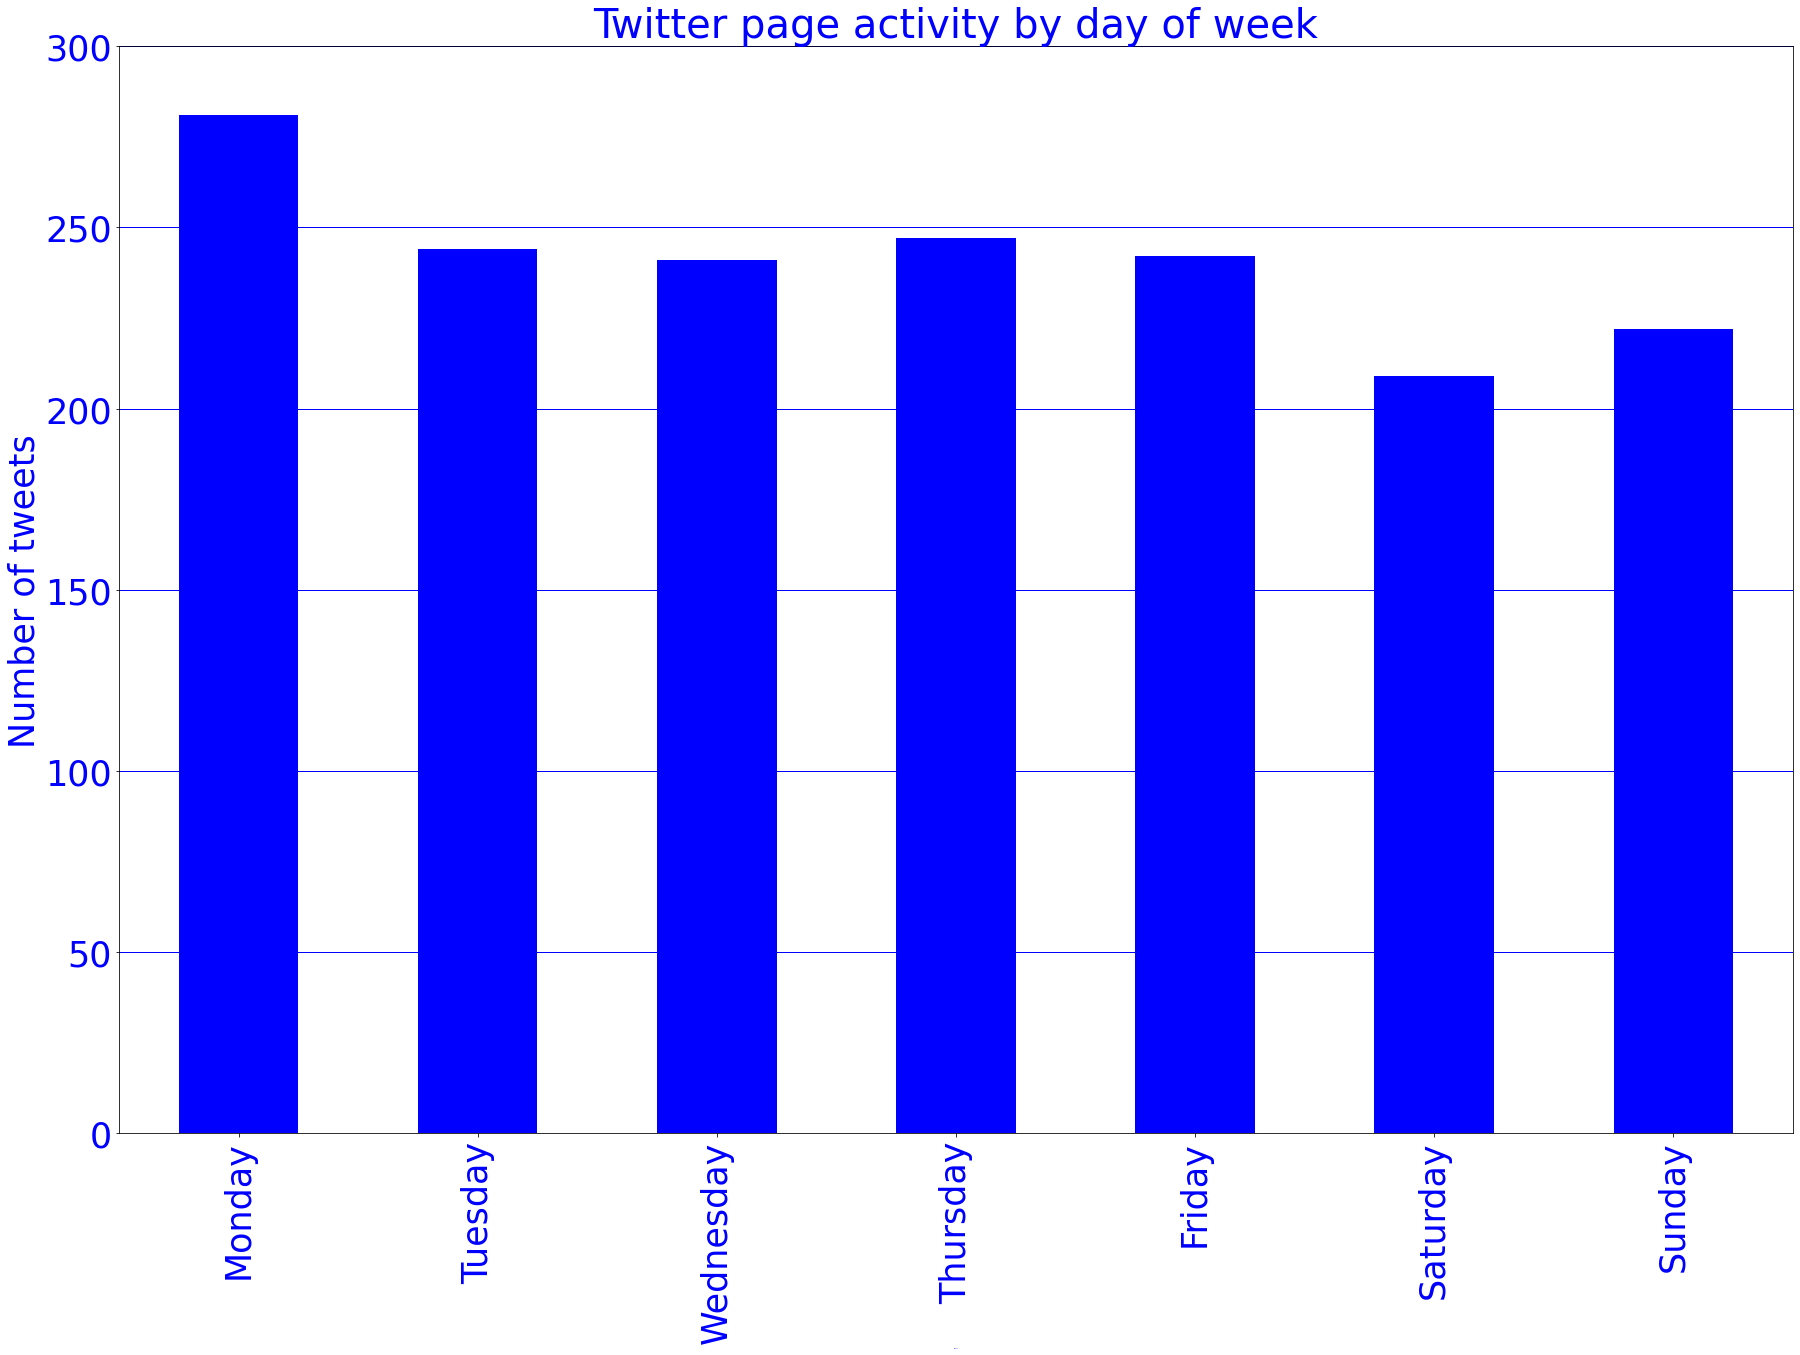

In [123]:
daily_act.plot(kind='bar',figsize=(30,20),color='b', legend=None)
plt.title('Twitter page activity by day of week',fontsize=40, color='b')
plt.xlabel('Weekday',fontsize=0, color='b')
plt.xticks(fontsize=35, color='b')
plt.ylabel('Number of tweets',fontsize=35, color='b')
plt.yticks(fontsize=35, color='b')
plt.grid(axis='y',linewidth=1,color='b')
plt.ylim((0,300))
plt.show()

<a id='ins2'></a>
### Insight two & visualization: What's the most common breed in the dataset?
We'll summarize the dataframe by dog breed and the number of occurences for each breed to see what the most common breed is.

In [124]:
common_breed = combined_data[['tweet_id','breed']].copy()
common_breed.head()

,tweet_id,breed
0,666020888022790149,Welsh springer spaniel
1,666029285002620928,Redbone
2,666033412701032449,German shepherd
3,666044226329800704,Rhodesian ridgeback
4,666049248165822465,Miniature pinscher


In [125]:
common_breed['breed'].value_counts().head(10)

Golden retriever      158
Labrador retriever    108
Pembroke               95
Chihuahua              91
Pug                    62
Toy poodle             51
Chow                   48
Pomeranian             42
Samoyed                42
Malamute               33
Name: breed, dtype: int64

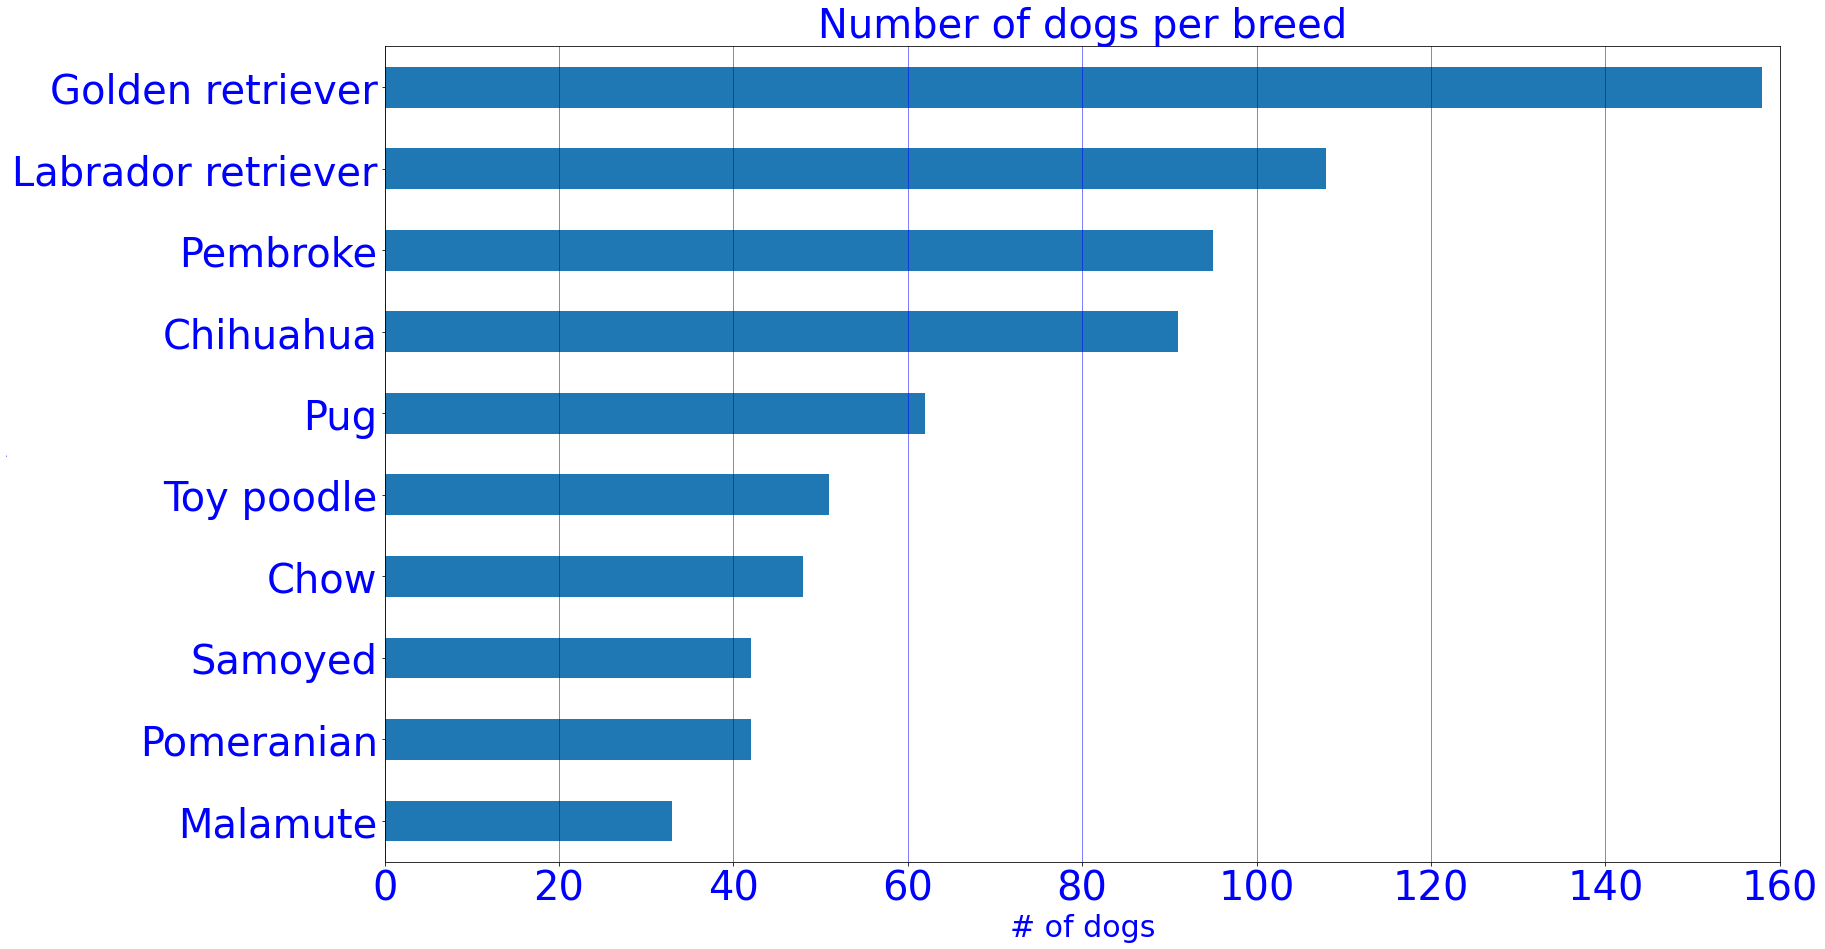

In [126]:
common_breed['breed'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh',figsize=(25,15))

plt.title('Number of dogs per breed',fontsize=40, color='b')
plt.xlabel('# of dogs',fontsize=30, color='b')
plt.xticks(fontsize=40, color='b')
plt.ylabel('Breed',fontsize=0, color='b')
plt.yticks(fontsize=40, color='b')
plt.xlim(0,160)
plt.ylabel('Breed', color='b')
plt.grid(axis='x', linewidth=0.5, color='b')
plt.show()

<a id='ins3'></a>
### Insight three & visualization: Which is the top rated breed?
We'll take a look at the top ten breeds in terms of rating.

In [127]:
# I like to create new dfs specifically for plotting just to make sure I'm not making any changes to the
# source dataframes.
breed_ratings = combined_data[['rating','breed']].copy()
breed_ratings = breed_ratings.groupby('breed').mean().rating.sort_values(ascending=False)
print('Top rated breeds')
breed_ratings.head(10)

Top rated breeds


breed
Bouvier des flandres    130.000000
Saluki                  125.000000
Briard                  123.333333
Tibetan mastiff         122.500000
Border terrier          121.428571
Silky terrier           120.000000
Standard schnauzer      120.000000
Gordon setter           117.500000
Irish setter            117.500000
Golden retriever        117.213135
Name: rating, dtype: float64

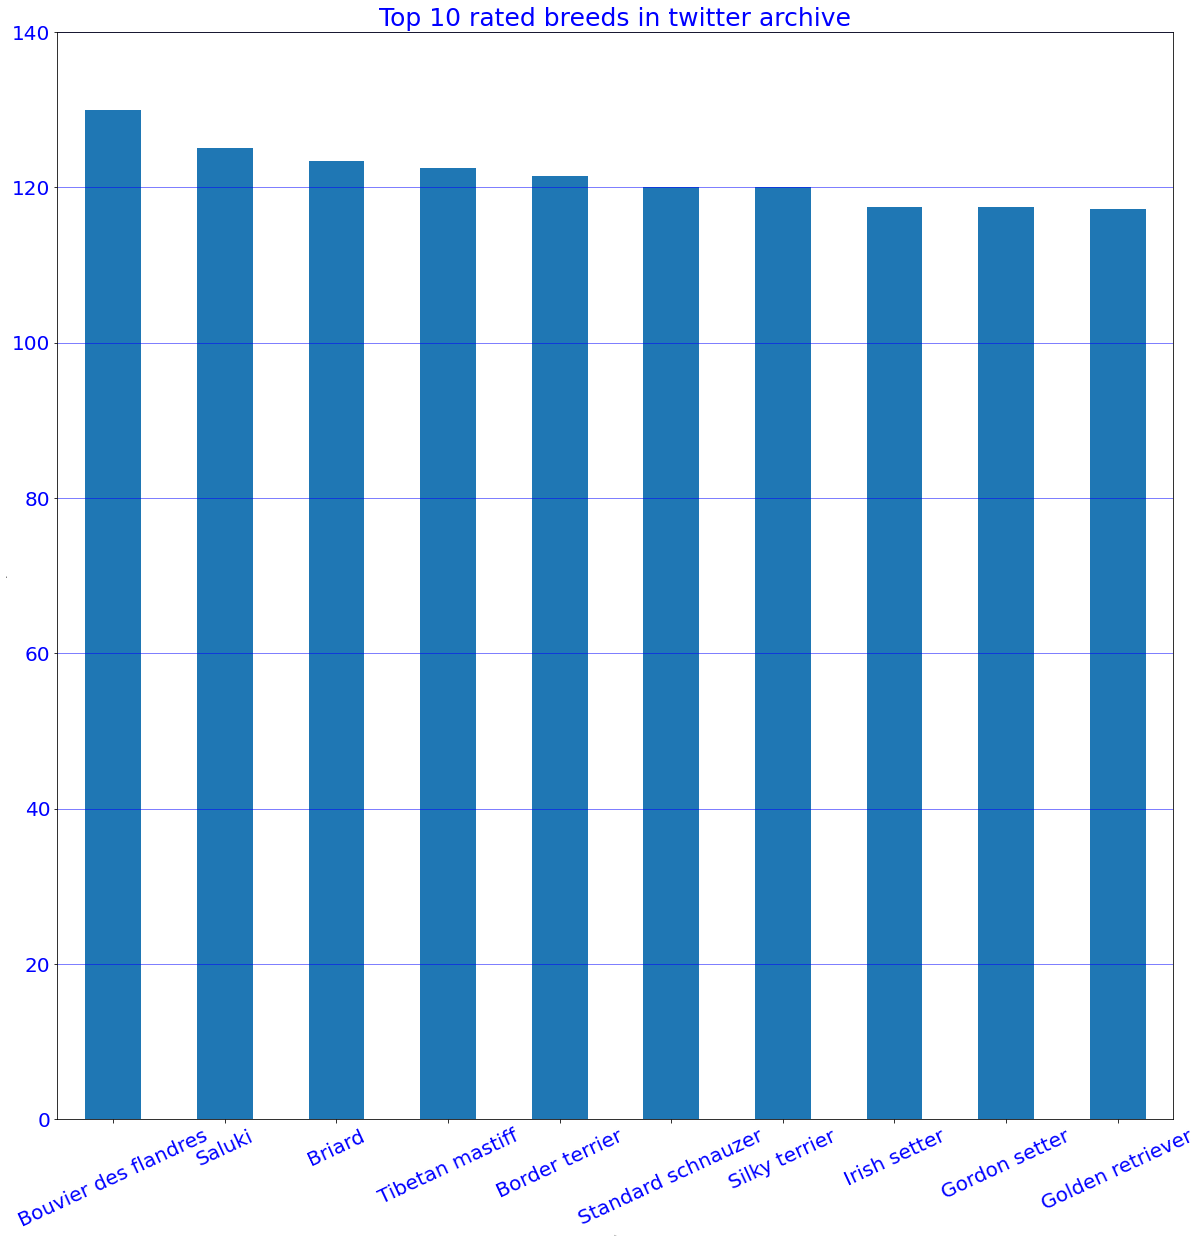

In [128]:
breed_rating_plot = breed_ratings.sort_values().tail(10)

breed_rating_plot.sort_values(ascending=False).plot(kind='bar', figsize=(20,20), legend=None)
plt.title('Top 10 rated breeds in twitter archive',fontsize=25, color='b')
plt.xlabel('Rating',fontsize=0)
plt.xticks(fontsize=20, color='b',rotation=25)
plt.ylabel('Breed',fontsize=0)
plt.yticks(fontsize=20, color='b')
plt.ylim(0,140)
plt.grid(axis='y', linewidth=0.5, color='b')
plt.show()

In [129]:
# Cleaned DF to twitter_archive_master.cvs
combined_data.to_csv('twitter_archive_master.csv',
                 index=False, encoding = 'utf-8')

# Please refer to "Twitter activity report" for the analysis performed and to "Wrangle report" for the details on how the data was wrangled.